# SSBCI Loan Analysis

In [1]:
# Sources: 
# Python Machine Learning 3rd Edition by Sebastian Raschka, Packt Publishing Ltd. 2019

import pandas as pd

SSBCIData = pd.read_csv('https://raw.githubusercontent.com/tkelly9/Small-Business-Loan-Impacts/main/SSBCI%20Transactions%20Dataset.csv')

In [2]:
SSBCIData.head()

,state_id,state_name,year_reported,program_name,program_type,unique_id,disbursement_date,loan_investment_amount,ssbci_original_funds,nonprivate_amount,...,optional_revenue,optional_revenue_yr_confirmed,optional_active,optional_active_no,optional_active_unknown,optional_dollars_lost,optional_business_city,optional_business_state,optional_coinvestment_source,optional_stage
0,AK,Alaska - Anchorage,2013,49th State Venture Fund,Venture Capital,AK_2013_VCP_1,3/1/13,180000.0,90000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,Alaska - Anchorage,2013,49th State Venture Fund,Venture Capital,AK_2013_VCP_2,7/13/13,2400000.0,250000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AK,Alaska - Anchorage,2013,49th State Venture Fund,Venture Capital,AK_2013_VCP_3,12/30/13,265000.0,110000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AK,Alaska - Anchorage,2014,49th State Venture Fund,Venture Capital,AK_2014_VCP_1,4/11/14,199500.0,99750.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AK,Alaska - Anchorage,2014,49th State Venture Fund,Venture Capital,AK_2014_VCP_2,5/15/14,125000.0,62500.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
SSBCIData.columns

Index(['state_id', 'state_name', 'year_reported', 'program_name',
       'program_type', 'unique_id', 'disbursement_date',
       'loan_investment_amount', 'ssbci_original_funds', 'nonprivate_amount',
       'concurrent_private_financing', 'borrower_insurance_premium',
       'lender_insurance_premium', 'guaranteed_amount', 'collateral_support',
       'ssbci_recycled_funds', 'subsequent_private_financing', 'zip_code',
       'metro_type', 'LMI_type', 'revenue', 'full_time_employees',
       'naics_code', 'year_incorporated', 'jobs_created', 'jobs_retained',
       'trans_type', 'lender_name', 'lender_type', 'lender_type_category',
       'CDFI_type', 'MDI_type', 'VC_cat', 'optional_woman_owned',
       'optional_minority_owned', 'optional_veteran_owned', 'optional_FTE',
       'optional_FTE_yr_confirmed', 'optional_primary_use_of_funds',
       'optional_revenue', 'optional_revenue_yr_confirmed', 'optional_active',
       'optional_active_no', 'optional_active_unknown',
       'option

In [4]:
SSBCIData.shape

(21962, 49)

In [5]:
SSBCIData.dtypes

state_id                          object
state_name                        object
year_reported                      int64
program_name                      object
program_type                      object
unique_id                         object
disbursement_date                 object
loan_investment_amount           float64
ssbci_original_funds             float64
nonprivate_amount                float64
concurrent_private_financing     float64
borrower_insurance_premium       float64
lender_insurance_premium         float64
guaranteed_amount                float64
collateral_support               float64
ssbci_recycled_funds             float64
subsequent_private_financing     float64
zip_code                           int64
metro_type                        object
LMI_type                          object
revenue                          float64
full_time_employees              float64
naics_code                         int64
year_incorporated                  int64
jobs_created    

In [6]:
SSBCIData.isnull().sum()

state_id                             0
state_name                           0
year_reported                        0
program_name                         0
program_type                         0
unique_id                            0
disbursement_date                    0
loan_investment_amount               0
ssbci_original_funds                 0
nonprivate_amount                    0
concurrent_private_financing         0
borrower_insurance_premium           0
lender_insurance_premium             0
guaranteed_amount                    0
collateral_support                   0
ssbci_recycled_funds                 0
subsequent_private_financing         0
zip_code                             0
metro_type                           0
LMI_type                             0
revenue                              0
full_time_employees                  0
naics_code                           0
year_incorporated                    0
jobs_created                         0
jobs_retained            

In [7]:
SSBCIData.isna().sum()

state_id                             0
state_name                           0
year_reported                        0
program_name                         0
program_type                         0
unique_id                            0
disbursement_date                    0
loan_investment_amount               0
ssbci_original_funds                 0
nonprivate_amount                    0
concurrent_private_financing         0
borrower_insurance_premium           0
lender_insurance_premium             0
guaranteed_amount                    0
collateral_support                   0
ssbci_recycled_funds                 0
subsequent_private_financing         0
zip_code                             0
metro_type                           0
LMI_type                             0
revenue                              0
full_time_employees                  0
naics_code                           0
year_incorporated                    0
jobs_created                         0
jobs_retained            

In [8]:
from sklearn import preprocessing
categoricalData = ['metro_type','LMI_type','trans_type', 'CDFI_type','MDI_type','VC_cat']

SSBCIDF = SSBCIData[['state_id','state_name','year_reported','program_name','program_type','unique_id','disbursement_date','loan_investment_amount','ssbci_original_funds','nonprivate_amount','concurrent_private_financing','borrower_insurance_premium','lender_insurance_premium','guaranteed_amount','collateral_support','ssbci_recycled_funds','subsequent_private_financing','zip_code','metro_type','LMI_type','revenue','full_time_employees','naics_code','year_incorporated','jobs_created','jobs_retained','trans_type','CDFI_type','MDI_type','VC_cat']]
le = preprocessing.LabelEncoder()
SSBCIDF['metro_type'] = le.fit_transform(SSBCIDF['metro_type'])
SSBCIDF['LMI_type'] = le.fit_transform(SSBCIDF['LMI_type'])
SSBCIDF['trans_type'] = le.fit_transform(SSBCIDF['trans_type'])
SSBCIDF['CDFI_type'] = le.fit_transform(SSBCIDF['CDFI_type'])
SSBCIDF['MDI_type'] = le.fit_transform(SSBCIDF['MDI_type'])
SSBCIDF['VC_cat'] = le.fit_transform(SSBCIDF['VC_cat'])
SSBCIDF['program_type'] = le.fit_transform(SSBCIDF['program_type'])

/var/folders/9m/c4ktf3_90p117pj25cgd8j0r0000gp/T/ipykernel_5543/3132304090.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SSBCIDF['metro_type'] = le.fit_transform(SSBCIDF['metro_type'])
/var/folders/9m/c4ktf3_90p117pj25cgd8j0r0000gp/T/ipykernel_5543/3132304090.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SSBCIDF['LMI_type'] = le.fit_transform(SSBCIDF['LMI_type'])
/var/folders/9m/c4ktf3_90p117pj25cgd8j0r0000gp/T/ipykernel_5543/3132304090.py:8: SettingWithCopyWarning: 
A value is trying to be set 

In [9]:
!pip install mlxtend

In [10]:
# cols2 = ['loan_investment_amount','ssbci_original_funds','nonprivate_amount','concurrent_private_financing',
#           'guaranteed_amount','revenue', 'full_time_employees', 'jobs_created', 
#        'jobs_retained']
cols2 = ['full_time_employees', 'jobs_created','jobs_retained']

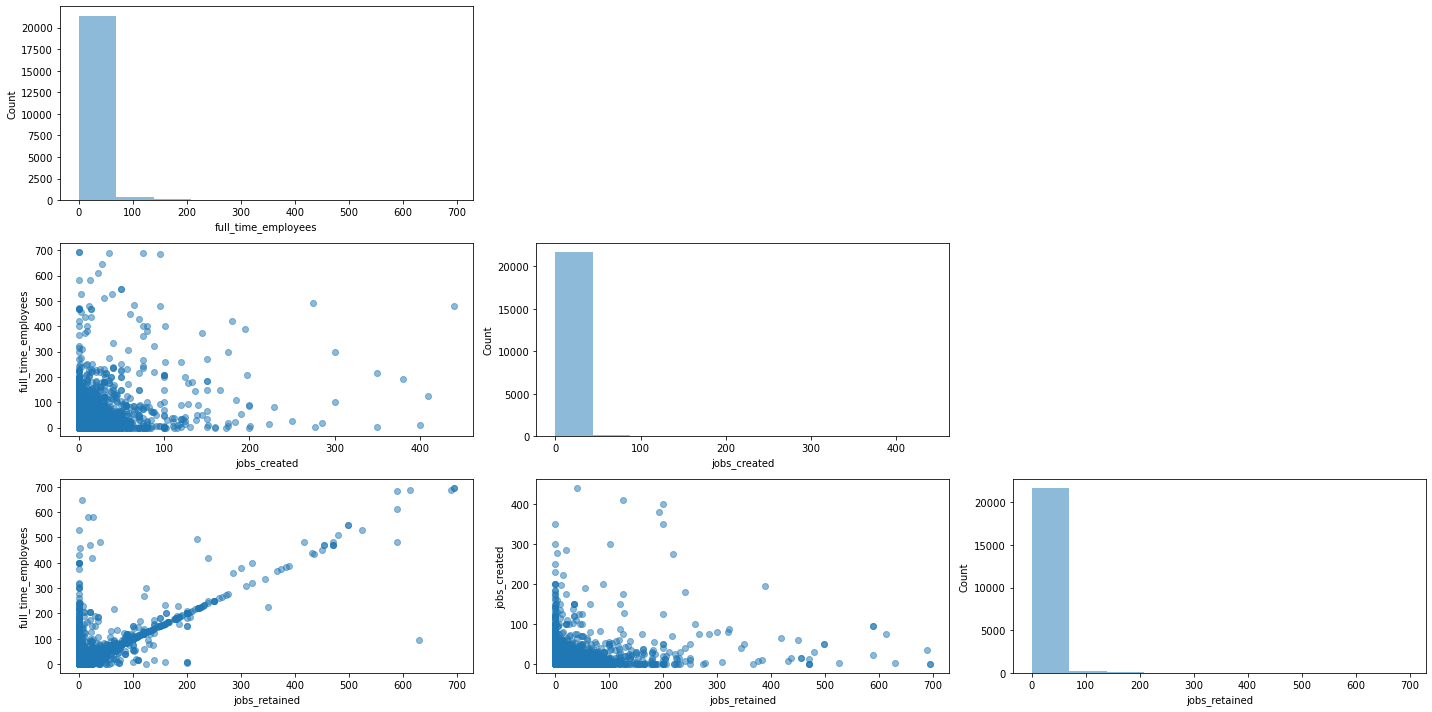

In [11]:
from mlxtend.plotting import scatterplotmatrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy import inf
import numpy as np

scatterplotmatrix(SSBCIDF[cols2].values, figsize= (20,10), names=cols2, alpha=0.5)
plt.tight_layout()
plt.show()

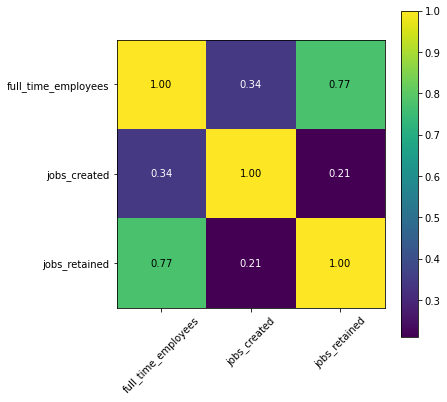

In [12]:
from mlxtend.plotting import heatmap

data = SSBCIDF[cols2].dropna()

cm = np.corrcoef(data.values.T)
hm = heatmap(cm, row_names = cols2, column_names = cols2, figsize=(6,6))

plt.show()

# Regression Models

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
SSBCIDF['Net_Job_Impact'] = SSBCIDF['jobs_created'] + SSBCIDF['jobs_retained']

/var/folders/9m/c4ktf3_90p117pj25cgd8j0r0000gp/T/ipykernel_5543/1559513258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SSBCIDF['Net_Job_Impact'] = SSBCIDF['jobs_created'] + SSBCIDF['jobs_retained']


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Xlin = SSBCIDF[['full_time_employees']].values
ylin = SSBCIDF['Net_Job_Impact'].values
sc.fit(Xlin)
x_std = sc.transform(Xlin)

In [16]:
ylin.shape

(21962,)

In [17]:
slr = LinearRegression()
reg = slr.fit(x_std, ylin)
y_pred = slr.predict(x_std)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 24.356
Intercept: 10.958


In [18]:
print('R^2 score', reg.score(x_std, ylin))

R^2 score 0.6026764724377622


In [19]:
slr.coef_

array([24.35631275])

In [20]:
# Sources: 
# Python Machine Learning 3rd Edition by Sebastian Raschka, Packt Publishing Ltd. 2019
def lin_regplot(Xlin, ylin, model):
    plt.scatter(Xlin, ylin, c='steelblue', edgecolor='white', s=70)
    plt.plot(Xlin, model.predict(Xlin), color='black', lw=2)    
    return 

### Linear Regression plot shows that the number of full time employees at the time of the loan closure is positively correlated with the number of jobs retained as a direct result of the loan

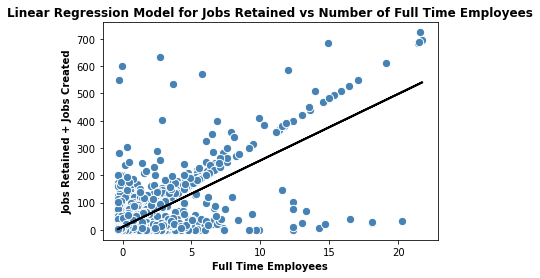

In [21]:
lin_regplot(x_std, ylin, slr)
plt.title('Linear Regression Model for Jobs Retained vs Number of Full Time Employees', fontweight='bold')
plt.xlabel('Full Time Employees', fontweight='bold')
plt.ylabel('Jobs Retained + Jobs Created', fontweight='bold')


plt.show()

In [22]:
import statsmodels.api as sm
Xlinstats = SSBCIDF[['ssbci_original_funds',
          'guaranteed_amount', 'full_time_employees','loan_investment_amount', 'revenue','collateral_support','metro_type','CDFI_type','MDI_type','VC_cat']].values
ylinstats = SSBCIDF['Net_Job_Impact'].values
est = sm.OLS(ylinstats, Xlinstats)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.657
Method:                 Least Squares   F-statistic:                              4202.
Date:                Thu, 12 May 2022   Prob (F-statistic):                        0.00
Time:                        14:32:35   Log-Likelihood:                         -96362.
No. Observations:               21962   AIC:                                  1.927e+05
Df Residuals:                   21952   BIC:                                  1.928e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Classification Models

In [23]:
SSBCIDF.loc[SSBCIDF['Net_Job_Impact'] > 0, 'CreationStatus'] = 1
SSBCIDF.loc[SSBCIDF['Net_Job_Impact'] == 0, 'CreationStatus'] = 0

/Users/tomkelly/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/tomkelly/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [24]:
# Used backward and forward selection to select predictor variables

XC = SSBCIDF[['loan_investment_amount','lender_insurance_premium','ssbci_recycled_funds','revenue','full_time_employees','CDFI_type']].values
yc = SSBCIDF['CreationStatus'].values

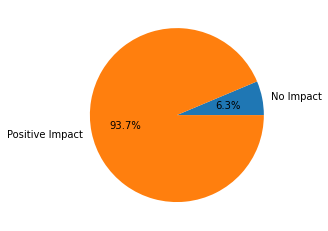

In [25]:
# Source: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

nonzero_vals = np.count_nonzero(SSBCIDF['Net_Job_Impact'])/len(SSBCIDF['Net_Job_Impact'])
zero_vals = 1 - nonzero_vals
percentage = [zero_vals*100, nonzero_vals*100]

mylabels = ['No Impact', 'Positive Impact']

plt.pie(percentage, labels = mylabels, autopct='%1.1f%%')
plt.show() 

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    XC, yc, test_size=0.3, random_state=1, stratify=yc)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, recall_score

from sklearn.linear_model import LogisticRegression


sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [28]:
lr = LogisticRegression(penalty='l2',random_state=1, solver='lbfgs', C=100.0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('Accuracy score')
ac = accuracy_score(y_test, y_pred)
print(ac)
print('Precision score')
pr = precision_score(y_test, y_pred)
print(pr)
print('Recall score')
re = recall_score(y_test, y_pred)
print(re)
print('F1 score')
f1 = f1_score(y_test, y_pred)
print(f1)

Confusion matrix
[[   0  417]
 [   0 6172]]
Accuracy score
0.9367127029898316
Precision score
0.9367127029898316
Recall score
1.0
F1 score
0.9673223101637802


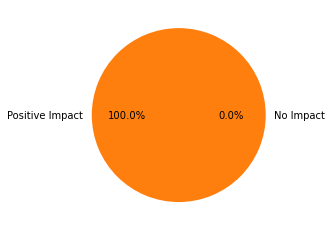

In [29]:
mylabels = ['No Impact', 'Positive Impact']
nonzero_vals = np.count_nonzero(y_pred)/len(y_pred)
zero_vals = 1-nonzero_vals
percentage = [zero_vals*100, nonzero_vals*100]
plt.pie(percentage, labels = mylabels, autopct='%1.1f%%')
plt.show() 


In [30]:
print(lr.coef_)

[[ 0.20892519  0.00577398 -0.07732675 -0.00927571 -0.0067639  -0.7632972 ]]


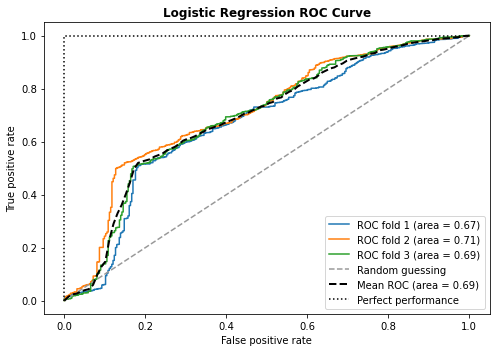

In [31]:
# Source: 
# Python Machine Learning 3rd Edition by Sebastian Raschka, Packt Publishing Ltd. 2019

from sklearn.metrics import roc_curve, auc
from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold


if scipy_version >= Version('1.4.1'):
    from numpy import interp
else:
    from scipy import interp

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', 
                                           random_state=1,
                                           solver='lbfgs',
                                           C=100.0))
#X_train2 = X_train[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title('Logistic Regression ROC Curve', fontweight = 'bold')
plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

In [32]:
from sklearn.svm import SVC

svc = SVC(probability=True, random_state=1)
svc.fit(X_train_std, y_train)
y_pred_svc = svc.predict(X_test_std)
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_svc))
print('Accuracy score')
ac = accuracy_score(y_test, y_pred_svc)
print(ac)
print('Precision score')
pr = precision_score(y_test, y_pred_svc)
print(pr)
print('Recall score')
re = recall_score(y_test, y_pred_svc)
print(re)
print('F1 score')
f1 = f1_score(y_test, y_pred_svc)
print(f1)

Confusion matrix
[[   0  417]
 [   0 6172]]
Accuracy score
0.9367127029898316
Precision score
0.9367127029898316
Recall score
1.0
F1 score
0.9673223101637802


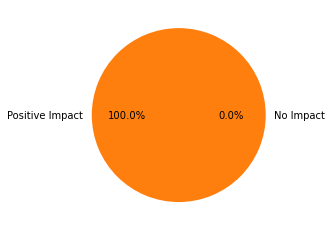

In [33]:
mylabels = ['No Impact', 'Positive Impact']
nonzero_vals = np.count_nonzero(y_pred_svc)/len(y_pred_svc)
zero_vals = 1-nonzero_vals
percentage = [zero_vals*100, nonzero_vals*100]
plt.pie(percentage, labels = mylabels, autopct='%1.1f%%')
plt.show() 


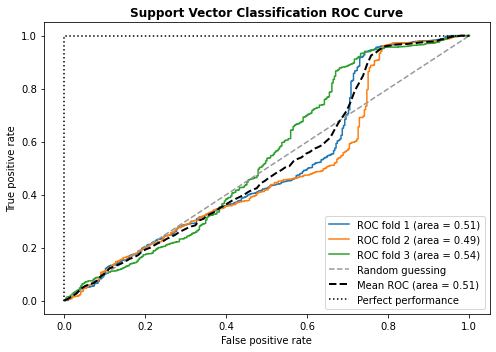

In [34]:
# Source: 
# Python Machine Learning 3rd Edition by Sebastian Raschka, Packt Publishing Ltd. 2019


if scipy_version >= Version('1.4.1'):
    from numpy import interp
else:
    from scipy import interp

# reducing n_components reduces dimensionality


pipe_lr = make_pipeline(StandardScaler(),
                        SVC(probability=True, random_state=1))
#X_train2 = X_train[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title('Support Vector Classification ROC Curve', fontweight = 'bold')

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

#### Gradient Boosing Classifier has the highest accuracy for predicting whether jobs were created as a result of the loans. Therefore, this will be the model chosen for predicting whether jobs were created as a direct result of the loans.

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier()
boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_boost))
print('Accuracy score')
ac = accuracy_score(y_test, y_pred_boost)
print(ac)
print('Precision score')
pr = precision_score(y_test, y_pred_boost)
print(pr)
print('Recall score')
re = recall_score(y_test, y_pred_boost)
print(re)
print('F1 score')
f1 = f1_score(y_test, y_pred_boost)
print(f1)

Confusion matrix
[[  61  356]
 [  26 6146]]
Accuracy score
0.942024586431932
Precision score
0.9452476161181175
Recall score
0.9957874270900843
F1 score
0.9698595549944768


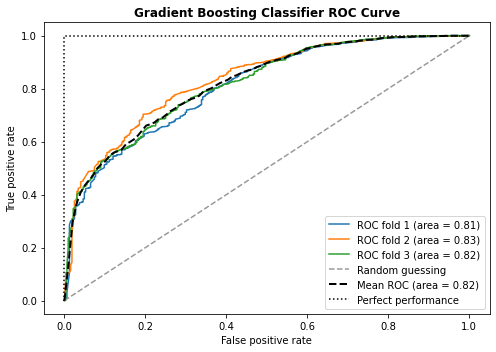

In [36]:
# Sources: 
# Python Machine Learning 3rd Edition by Sebastian Raschka, Packt Publishing Ltd. 2019

if scipy_version >= Version('1.4.1'):
    from numpy import interp
else:
    from scipy import interp

# reducing n_components reduces dimensionality


pipe_lr = make_pipeline(StandardScaler(),
                        GradientBoostingClassifier())

    

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title('Gradient Boosting Classifier ROC Curve', fontweight = 'bold')

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

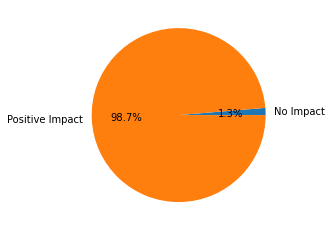

In [37]:
mylabels = ['No Impact', 'Positive Impact']
nonzero_vals = np.count_nonzero(y_pred_boost)/len(y_pred_boost)
zero_vals = 1-nonzero_vals
percentage = [zero_vals*100, nonzero_vals*100]
plt.pie(percentage, labels = mylabels, autopct='%1.1f%%')
plt.show() 


In [38]:
!pip install shap

#### Shapley values used to select most significant features for the gradient boosing model

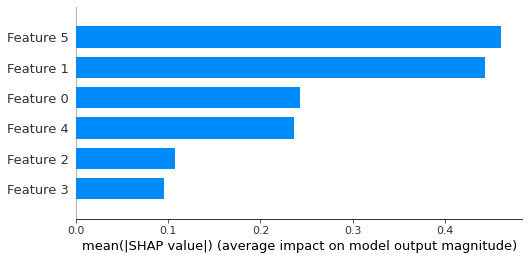

In [39]:
import shap

explainer_km = shap.TreeExplainer(boost)
shap_values_km = explainer_km.shap_values(XC)
shap.summary_plot(shap_values_km, XC, plot_type="bar")